In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

final_states = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/X9_stability_analysis/results/all_final_states')
print(final_states.index.levels)

Populating the interactive namespace from numpy and matplotlib
[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], [6000, 7000, 8000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], ['final max cluster size', 'final population', 'final trade links']]


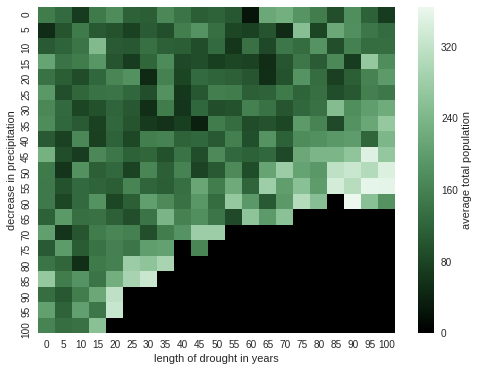

In [2]:
mean_data = final_states.groupby(level=[0, 1, 2, 4]).min().unstack('d_length')
mean_data.columns = mean_data.columns.droplevel()
mean_data.head()

pylab.rcParams['figure.figsize'] = (8, 6)

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(mean_data.xs(level=['r_trade', 'observables'], key=[7000, 'final trade links']).astype('int'), 
            fmt="d", 
            ax=ax,
            cmap=cmap,
            cbar_kws={'label': 'average total population'}
           )
ax.set_ylabel('decrease in precipitation')
ax.set_xlabel('length of drought in years')

fig.savefig('stability_analysis_plot')

Caption: Average population after recovery period resulting from a drought event of given length and decrease in precipitation.

In [11]:
trj_data = pd.read_pickle('/home/jakob/Project_MayaSim/Python/output_data/test_output/X9_stability_analysis/results/all_trajectories')

In [16]:
for key in trj_data.keys():
    print(trj_data[key].columns)

Index(['trajectory_list', 'trajectory_list', 'trajectory_list'], dtype='object', name='key')
Index(['trajectory_list', 'trajectory_list', 'trajectory_list'], dtype='object', name='key')
Index(['trajectory_list', 'trajectory_list', 'trajectory_list'], dtype='object', name='key')


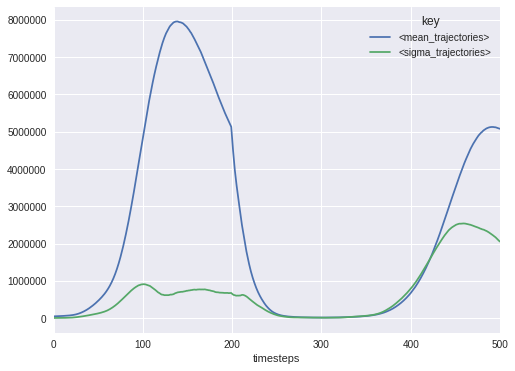

In [6]:
trj.plot()